# Analysis and prediction of Covid-19 in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px

In [2]:
df_covid = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
df_covid


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25577,25578,05/16/2020,Wyoming,US,2020-05-17 02:32:32,741.0,7.0,0.0
25578,25579,05/16/2020,Xinjiang,Mainland China,2020-05-17 02:32:32,76.0,3.0,73.0
25579,25580,05/16/2020,Yukon,Canada,2020-05-17 02:32:32,11.0,0.0,11.0
25580,25581,05/16/2020,Yunnan,Mainland China,2020-05-17 02:32:32,185.0,2.0,183.0


In [3]:
df_cov_ind = df_covid[df_covid["Country/Region"] == "India"]
df_cov_ind

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
23879,23880,05/12/2020,NaN,India,2020-05-13 03:32:26,74292.0,2415.0,24420.0
24202,24203,05/13/2020,NaN,India,2020-05-14 03:32:28,78055.0,2551.0,26400.0
24525,24526,05/14/2020,NaN,India,2020-05-15 02:33:02,81997.0,2649.0,27969.0
24902,24903,05/15/2020,NaN,India,2020-05-16 02:32:19,85784.0,2753.0,30258.0


In [4]:
df_cov_ind["Active"] = df_cov_ind["Confirmed"] - df_cov_ind["Deaths"] - df_cov_ind["Recovered"]
df_cov_ind

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0,1.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0,1.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0,1.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0,2.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
23879,23880,05/12/2020,NaN,India,2020-05-13 03:32:26,74292.0,2415.0,24420.0,47457.0
24202,24203,05/13/2020,NaN,India,2020-05-14 03:32:28,78055.0,2551.0,26400.0,49104.0
24525,24526,05/14/2020,NaN,India,2020-05-15 02:33:02,81997.0,2649.0,27969.0,51379.0
24902,24903,05/15/2020,NaN,India,2020-05-16 02:32:19,85784.0,2753.0,30258.0,52773.0


In [5]:
current = df_cov_ind.iloc[-1]
dead = current["Deaths"]
recov = current["Recovered"]
act = current["Active"]
patient_state = [["Active",act],["Death",dead],["Recovered",recov]]
df = pd.DataFrame(patient_state, columns=["Patient State","Count"])
fig = px.pie(df, values="Count", names="Patient State", title="State of Patients in India", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(name="Recovered",x = df_cov_ind["ObservationDate"],y=df_cov_ind["Recovered"]),
                      go.Bar(name="Deaths",x = df_cov_ind["ObservationDate"],y=df_cov_ind["Deaths"]),
                     go.Bar(name="Active",x = df_cov_ind["ObservationDate"],y=df_cov_ind["Active"])])
fig.update_layout(barmode='stack',title="India Covid-19 Pandemic Timeline")
fig.show()

## Statewise analysis

In [7]:
df_cov_ind1 = pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")
df_cov_ind1

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3
...,...,...,...,...,...,...,...,...,...
2014,2020-05-17,Telengana,0,0,971,18.1124,79.0193,34,1509
2015,2020-05-17,Tripura,0,0,64,23.9408,91.9882,0,167
2016,2020-05-17,Uttar Pradesh,0,0,2441,26.8467,80.9462,104,4258
2017,2020-05-17,Uttarakhand,0,0,51,30.0668,79.0193,1,88


In [8]:
df_cov_ind1["Date"] = pd.to_datetime(df_cov_ind1["Date"])
df_cov_ind1 = df_cov_ind1.drop(["Total Confirmed cases (Indian National)","Total Confirmed cases ( Foreign National )",\
                                 "Latitude","Longitude"],axis=1)

In [9]:
df_cov_state = df_cov_ind1[df_cov_ind1["Date"] == df_cov_ind1["Date"].max()]

df_cov_state = df_cov_state.rename(columns={"Name of State / UT":"State/UT","Total Confirmed cases":"Confirmed","Cured/Discharged/Migrated":"Cured"})
df_cov_state.index = range(0,len(df_cov_state))
df_cov_state

,Date,State/UT,Cured,Death,Confirmed
0,2020-05-17,Andaman and Nicobar Islands,33,0,33
1,2020-05-17,Andhra Pradesh,1353,49,2355
2,2020-05-17,Arunachal Pradesh,1,0,1
3,2020-05-17,Assam,41,2,92
4,2020-05-17,Bihar,453,7,1179
5,2020-05-17,Chandigarh,51,3,191
6,2020-05-17,Chhattisgarh,56,0,67
7,2020-05-17,Dadar Nagar Haveli,0,0,1
8,2020-05-17,Delhi,3926,129,9333
9,2020-05-17,Goa,7,0,17


### Number of confirmed cases by State/UT

In [10]:
fig = px.pie(df_cov_state[df_cov_state["Confirmed"]>100], values="Confirmed", names="State/UT", title="Number of confirmed by State/UT with major infection", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [11]:
import geopandas as gpd

In [12]:
df_map = gpd.read_file("../input/indian-states/Indian_States.shp")
df_map["st_nm"][df_map['st_nm'] == "NCT of Delhi"] = "Delhi"
df_map = df_map.sort_values("st_nm")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_map_state = df_cov_state[df_cov_state["State/UT"]!="Ladakh"][["Confirmed","State/UT"]]
JandK = df_cov_state["Confirmed"][df_cov_state["State/UT"] == "Jammu and Kashmir"].values[0]
df_map_state["Confirmed"][df_map_state["State/UT"] == "Jammu and Kashmir"] = JandK + df_cov_state["Confirmed"][df_cov_state["State/UT"] == "Ladakh"].values[0]

In [14]:
df_map["st_nm"][df_map["st_nm"] == "Jammu & Kashmir"] = "Jammu and Kashmir"
df_map["st_nm"][df_map["st_nm"] == "Andaman & Nicobar Island"] = "Andaman and Nicobar Islands"
df_map["st_nm"][df_map["st_nm"] == "Telangana"] = "Telengana"
df_map["st_nm"][df_map["st_nm"] == "Arunanchal Pradesh"] = "Arunachal Pradesh"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [15]:
merged_df = df_map.set_index('st_nm').join(df_map_state.set_index('State/UT'))
merged_df = merged_df.dropna()

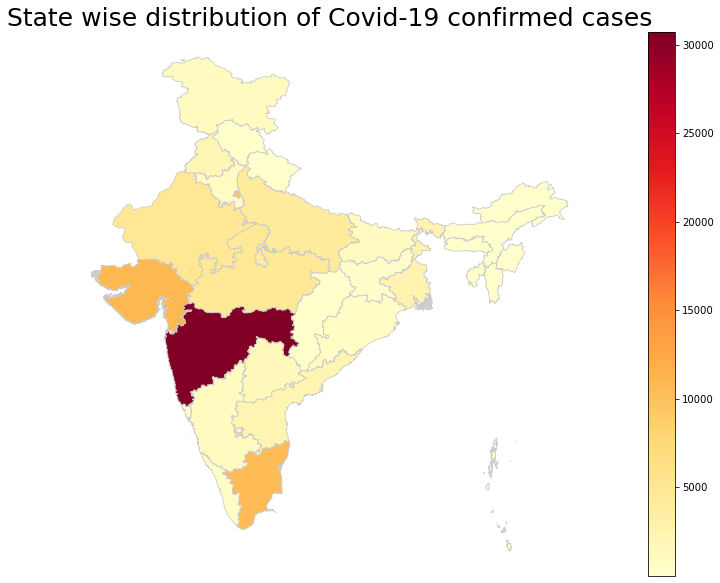

In [16]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('State wise distribution of Covid-19 confirmed cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_df.plot(column='Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

### Number of Deaths by State/UT

In [17]:
fig = px.pie(df_cov_state[df_cov_state["Confirmed"]>100], values="Death", names="State/UT", title="Number of deaths by State/UT with major infection", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [18]:
df_map_state["Death"] = df_cov_state["Death"]
JandK = df_cov_state["Death"][df_cov_state["State/UT"] == "Jammu and Kashmir"].values[0]
df_map_state["Death"][df_map_state["State/UT"] == "Jammu and Kashmir"] = JandK + df_cov_state["Death"][df_cov_state["State/UT"] == "Ladakh"].values[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
merged_df = df_map.set_index('st_nm').join(df_map_state.set_index('State/UT'))
merged_df = merged_df.dropna()

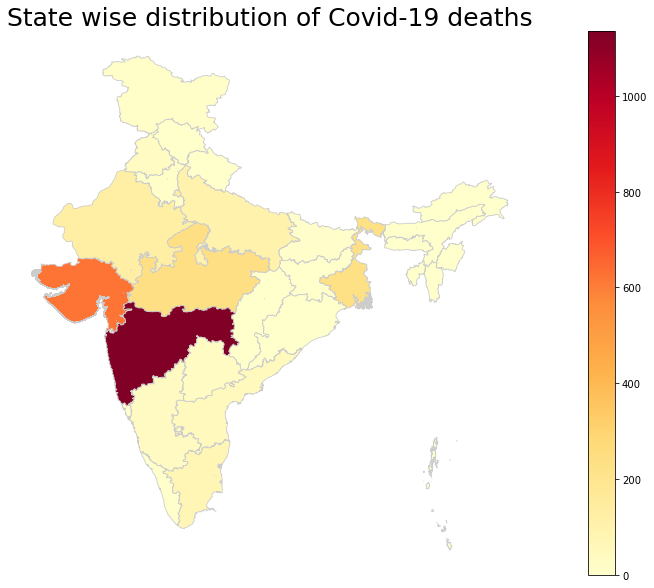

In [20]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('State wise distribution of Covid-19 deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_df.plot(column='Death', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

### Number of recovered by State/UT

In [21]:
fig = px.pie(df_cov_state[df_cov_state["Confirmed"]>100], values="Cured", names="State/UT", title="Number of recovered by State/UT with major infection", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [22]:
df_map_state["Recovered"] = df_cov_state["Cured"]
JandK = df_cov_state["Cured"][df_cov_state["State/UT"] == "Jammu and Kashmir"].values[0]
df_map_state["Recovered"][df_map_state["State/UT"] == "Jammu and Kashmir"] = JandK + df_cov_state["Cured"][df_cov_state["State/UT"] == "Ladakh"].values[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
merged_df = df_map.set_index('st_nm').join(df_map_state.set_index('State/UT'))
merged_df = merged_df.dropna()

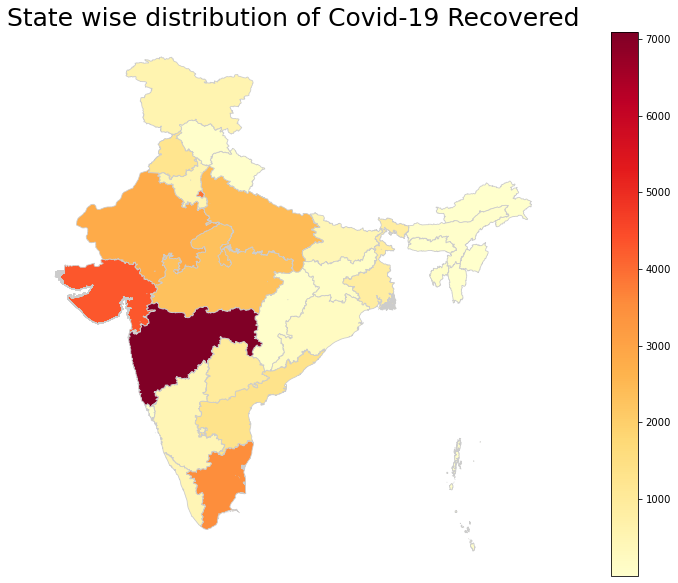

In [24]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('State wise distribution of Covid-19 Recovered', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_df.plot(column='Recovered', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

### Number of Active cases by State/UT


In [25]:
df_map_state["Active"] = df_map_state["Confirmed"] - (df_map_state["Death"]+df_map_state["Recovered"])
df_map_state

,Confirmed,State/UT,Death,Recovered,Active
0,33,Andaman and Nicobar Islands,0,33,0
1,2355,Andhra Pradesh,49,1353,953
2,1,Arunachal Pradesh,0,1,0
3,92,Assam,2,41,49
4,1179,Bihar,7,453,719
5,191,Chandigarh,3,51,137
6,67,Chhattisgarh,0,56,11
7,1,Dadar Nagar Haveli,0,0,1
8,9333,Delhi,129,3926,5278
9,17,Goa,0,7,10


In [26]:
fig = px.pie(df_map_state[df_map_state["Confirmed"]>100], values="Active", names="State/UT", title="Number of Active cases by State/UT with major infection", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [27]:
merged_df = df_map.set_index('st_nm').join(df_map_state.set_index('State/UT'))
merged_df = merged_df.dropna()

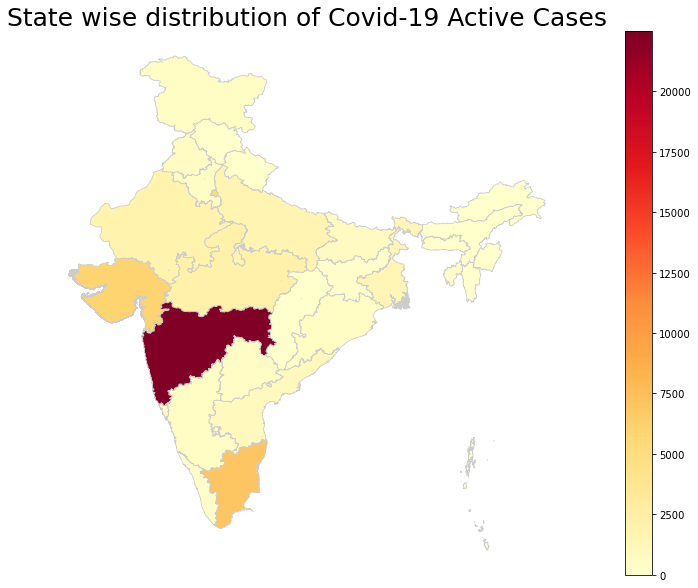

In [28]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('State wise distribution of Covid-19 Active Cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_df.plot(column='Active', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

## Statewise testing analysis

In [29]:
df_state_test = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_state_test

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
1137,2020-05-13,West Bengal,57632.0,NaN,2290.0
1138,2020-05-14,West Bengal,62837.0,NaN,1394.0
1139,2020-05-15,West Bengal,69543.0,NaN,1407.0
1140,2020-05-16,West Bengal,77288.0,NaN,1452.0


In [30]:
df_state_test[df_state_test["State"] == "Manipur"]

,Date,State,TotalSamples,Negative,Positive
674,2020-04-14,Manipur,276.0,NaN,2.0
675,2020-04-17,Manipur,311.0,NaN,2.0
676,2020-04-24,Manipur,402.0,NaN,2.0
677,2020-04-25,Manipur,416.0,NaN,2.0
678,2020-04-30,Manipur,459.0,NaN,2.0
679,2020-05-01,Manipur,461.0,NaN,2.0
680,2020-05-02,Manipur,468.0,NaN,2.0
681,2020-05-04,Manipur,571.0,NaN,2.0
682,2020-05-07,Manipur,684.0,NaN,2.0
683,2020-05-08,Manipur,756.0,NaN,2.0


In [31]:
df_state_test1 = pd.DataFrame(columns=["State","TotalSamples","Negative","Positive"])

for state in df_state_test["State"].unique():
    temp_df = df_state_test[df_state_test["State"] == state]
    temp_df = temp_df.dropna()
    
    temp_df.drop(["Date"],axis=1,inplace=True)
    if(len(temp_df) > 0):
        df_state_test1 = df_state_test1.append(temp_df.iloc[-1])
df_state_test = df_state_test1
df_state_test.index = range(0,len(df_state_test))
df_state_test["PositivePercent"] = df_state_test["Positive"]/df_state_test["TotalSamples"]
df_state_test["NegativePercent"] = df_state_test["Negative"]/df_state_test["TotalSamples"]
df_state_test

,State,TotalSamples,Negative,Positive,PositivePercent,NegativePercent
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,0.008553,0.862438
1,Andhra Pradesh,238998.0,236618.0,2230.0,0.009331,0.990042
2,Arunachal Pradesh,3349.0,2966.0,2.0,0.000597,0.885638
3,Assam,34376.0,32035.0,97.0,0.002822,0.931900
4,Bihar,3037.0,2299.0,32.0,0.010537,0.756997
5,Chandigarh,2812.0,2604.0,191.0,0.067923,0.926031
6,Chhattisgarh,32678.0,31275.0,67.0,0.002050,0.957066
7,Dadra and Nagar Haveli and Daman and Diu,382.0,382.0,0.0,0.000000,1.000000
8,Delhi,47225.0,39920.0,3439.0,0.072822,0.845315
9,Goa,220.0,197.0,5.0,0.022727,0.895455


In [32]:
fig = go.Figure(data=[go.Bar(name="Positive",x = df_state_test["State"],y=df_state_test["Positive"]),
                      go.Bar(name="Negative",x = df_state_test["State"],y=df_state_test["Negative"])])
fig.update_layout(barmode='stack',title="Statewise testing results")
fig.show()

In [33]:
fig = px.pie(df_state_test, values="PositivePercent", names="State", title="States by positive test result percentage", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [34]:
fig = px.pie(df_state_test, values="TotalSamples", names="State", title="States by number of tests conducted", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [35]:
df_pop = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")
df_pop = df_pop.rename(columns={"State / Union Territory":"State"})
df_state_testpop = df_state_test.join(df_pop.set_index('State'),how="left",on="State", rsuffix='Population')
df_state_testpop = df_state_testpop.drop(["Sno","Rural population","Urban population","Area","Density","Gender Ratio"],axis=1)
df_state_testpop["Test/1M"] = (df_state_testpop["TotalSamples"]/df_state_testpop["Population"])*1000000
df_state_testpop

,State,TotalSamples,Negative,Positive,PositivePercent,NegativePercent,Population,Test/1M
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,0.008553,0.862438,380581.0,3686.468846
1,Andhra Pradesh,238998.0,236618.0,2230.0,0.009331,0.990042,49577103.0,4820.733474
2,Arunachal Pradesh,3349.0,2966.0,2.0,0.000597,0.885638,1383727.0,2420.275098
3,Assam,34376.0,32035.0,97.0,0.002822,0.931900,31205576.0,1101.597996
4,Bihar,3037.0,2299.0,32.0,0.010537,0.756997,104099452.0,29.174025
5,Chandigarh,2812.0,2604.0,191.0,0.067923,0.926031,1055450.0,2664.266427
6,Chhattisgarh,32678.0,31275.0,67.0,0.002050,0.957066,25545198.0,1279.222811
7,Dadra and Nagar Haveli and Daman and Diu,382.0,382.0,0.0,0.000000,1.000000,585764.0,652.139770
8,Delhi,47225.0,39920.0,3439.0,0.072822,0.845315,16787941.0,2813.031092
9,Goa,220.0,197.0,5.0,0.022727,0.895455,1458545.0,150.835250


In [36]:
df_state_testpop["TotalSamples"][df_state_testpop["State"] == "Andhra Pradesh"] = df_state_testpop["TotalSamples"][df_state_testpop["State"] == "Andhra Pradesh"].values[0] + \
df_state_testpop["TotalSamples"][df_state_testpop["State"] == "Telangana"].values[0]
df_state_testpop.drop(index = df_state_testpop["TotalSamples"][df_state_testpop["State"] == "Telangana"].index[0],axis=0,inplace=True)
df_state_testpop["Test/1M"] = (df_state_testpop["TotalSamples"]/df_state_testpop["Population"])*1000000
df_state_testpop

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,TotalSamples,Negative,Positive,PositivePercent,NegativePercent,Population,Test/1M
0,Andaman and Nicobar Islands,1403.0,1210.0,12.0,0.008553,0.862438,380581.0,3686.468846
1,Andhra Pradesh,253960.0,236618.0,2230.0,0.009331,0.990042,49577103.0,5122.526018
2,Arunachal Pradesh,3349.0,2966.0,2.0,0.000597,0.885638,1383727.0,2420.275098
3,Assam,34376.0,32035.0,97.0,0.002822,0.931900,31205576.0,1101.597996
4,Bihar,3037.0,2299.0,32.0,0.010537,0.756997,104099452.0,29.174025
5,Chandigarh,2812.0,2604.0,191.0,0.067923,0.926031,1055450.0,2664.266427
6,Chhattisgarh,32678.0,31275.0,67.0,0.002050,0.957066,25545198.0,1279.222811
7,Dadra and Nagar Haveli and Daman and Diu,382.0,382.0,0.0,0.000000,1.000000,585764.0,652.139770
8,Delhi,47225.0,39920.0,3439.0,0.072822,0.845315,16787941.0,2813.031092
9,Goa,220.0,197.0,5.0,0.022727,0.895455,1458545.0,150.835250


In [37]:
fig = px.bar(df_state_testpop,x="State",y="Test/1M",title = "States by No. of tests per million")
fig.show()

In [38]:
fig = px.pie(df_state_testpop, values="Test/1M", names="State", title="States by number of tests per million", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

### Comparison of Public Health Facilities by state

In [39]:
df_state_phf = pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")
df_state_phf

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [40]:
df_state_phf.drop(index=len(df_state_phf)-1,axis=0,inplace=True)
df_state_phf.drop(["Sno","NumPrimaryHealthCenters_HMIS","NumCommunityHealthCenters_HMIS","NumSubDistrictHospitals_HMIS","NumDistrictHospitals_HMIS"],axis=1,inplace=True)



In [41]:
fig = px.bar(df_state_phf,x = "State/UT",y="TotalPublicHealthFacilities_HMIS",title="State by Health Facilities",labels={"TotalPublicHealthFacilities_HMIS":"Total Health Facilities"})
fig.show()

In [42]:
df_state_phf["TotalPublicHealthFacilities_HMIS"][df_state_phf["State/UT"] == "Andhra Pradesh"] = df_state_phf["TotalPublicHealthFacilities_HMIS"][df_state_phf["State/UT"] == "Andhra Pradesh"].values[0] + \
df_state_phf["TotalPublicHealthFacilities_HMIS"][df_state_phf["State/UT"] == "Telangana"].values[0]
df_state_phf.drop(index = df_state_phf["TotalPublicHealthFacilities_HMIS"][df_state_phf["State/UT"] == "Telangana"].index[0],axis=0,inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_state_phf["State/UT"][df_state_phf["State/UT"] == "Andaman & Nicobar Islands"] = "Andaman and Nicobar Islands"
df_state_phf["State/UT"][df_state_phf["State/UT"] == "Jammu & Kashmir"] = "Jammu and Kashmir"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_state_phf = df_state_phf.join(df_pop.set_index('State'),how="left",on="State/UT", rsuffix='Population')
df_state_phf["Facilities/1M"] = (df_state_phf["TotalPublicHealthFacilities_HMIS"]/df_state_phf["Population"])*1000000
df_state_phf

,State/UT,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio,Facilities/1M
0,Andaman and Nicobar Islands,34,1246,27,575,3,500,34.0,380581.0,237093.0,143488.0,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876.0,89.337092
1,Andhra Pradesh,2598,60799,193,6480,65,16658,10.0,49577103.0,34966693.0,14610410.0,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993.0,52.403223
2,Arunachal Pradesh,199,2320,208,2136,10,268,26.0,1383727.0,1066358.0,317369.0,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938.0,143.814495
3,Assam,1220,19115,1176,10944,50,6198,15.0,31205576.0,26807034.0,4398542.0,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954.0,39.095577
4,Bihar,2146,17796,930,6083,103,5936,3.0,104099452.0,92341436.0,11758016.0,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918.0,20.614902
5,Chandigarh,47,3756,0,0,4,778,32.0,1055450.0,28991.0,1026459.0,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818.0,44.530769
6,Chhattisgarh,1023,14354,169,5070,45,4342,17.0,25545198.0,19607961.0,5937237.0,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991.0,40.046666
7,Dadra & Nagar Haveli,13,568,10,273,1,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Daman & Diu,8,298,5,240,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Delhi,615,20572,0,0,109,24383,29.0,16787941.0,419042.0,16368899.0,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868.0,36.633438


In [45]:
df_state_phf = df_state_phf.dropna()

fig = px.bar(df_state_phf,x = "State/UT",y="Facilities/1M",title="Distribution of Health Facilities per million")
fig.show()

## Spread of Covid-19 in India over time

In [46]:
df_cov_ind1 = df_cov_ind1.rename(columns={"Name of State / UT":"State/UT"})
df_cov_ind1 = df_cov_ind1.rename(columns={"Name of State / UT":"State/UT","Total Confirmed cases":"Confirmed","Cured/Discharged/Migrated":"Cured"})


In [47]:
from PIL import Image
import datetime
from matplotlib.animation import FuncAnimation

In [48]:
len(df_cov_ind1["Date"].unique())

109

In [49]:

states = df_cov_ind1["State/UT"].unique()

#fig,ax = plt.subplots(figsize=(15,15))
for date in df_cov_ind1["Date"].unique()[::4]:
    
    df_temp = df_cov_ind1[df_cov_ind1["Date"] == date]
    
    for s in states:
        if s not in df_temp["State/UT"].values:
            df_temp = df_temp.append({"Date":date,"State/UT":s,"Cured":0,"Confirmed":0,"Death":0},ignore_index=True)
    df_temp1 = df_temp[df_temp["State/UT"]!="Ladakh"][["Date","Confirmed","Cured","Death","State/UT"]]
    JandK = df_temp["Confirmed"][df_temp["State/UT"] == "Jammu and Kashmir"].values[0]
    df_temp1["Confirmed"][df_temp1["State/UT"] == "Jammu and Kashmir"] = JandK + df_temp["Confirmed"][df_temp["State/UT"] == "Ladakh"].values[0]
    JandK = df_temp["Cured"][df_temp["State/UT"] == "Jammu and Kashmir"].values[0]
    df_temp1["Cured"][df_temp1["State/UT"] == "Jammu and Kashmir"] = JandK + df_temp["Cured"][df_temp["State/UT"] == "Ladakh"].values[0]
    JandK = df_temp["Death"][df_temp["State/UT"] == "Jammu and Kashmir"].values[0]
    df_temp1["Death"][df_temp1["State/UT"] == "Jammu and Kashmir"] = JandK + df_temp["Death"][df_temp["State/UT"] == "Ladakh"].values[0]
    
    df_temp = df_temp1
    #df_temp["Active"] = df_temp["Confirmed"] - df_temp["Death"] - df_temp["Cured"]
    
    merged_df = df_map.set_index('st_nm').join(df_temp.set_index('State/UT'))
    merged_df = merged_df.dropna()
    
    fig,ax = plt.subplots(figsize=(15,15))
    fig.patch.set_facecolor("blue")
    ax.set_facecolor("blue")
    fig1 = merged_df.plot(column='Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    fig1.axis('off')
    fig1.set_title('State wise distribution of Covid-19 Confirmed Cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
    
    date1 = datetime.datetime.utcfromtimestamp(date.tolist()/1e9)
    
    date1 = date1.strftime('%Y.%m.%d')
    fig1.annotate(date1,xy=(0.1, .225), xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    
    chart = fig1.get_figure()
    chart.patch.set_facecolor("blue")
    #plt.close(chart)
    chart.savefig(date1+"img.jpg",facecolor='blue')
    plt.close(fig)
    fig1.clear()
    fig.clear()
    ax.clear()
    #images.append(Image.open("img.jpg"))
    
#images[0].save("map.gif",save_all=True,append_images=images[1:],optimize=False,duration=100,loop=0)
    

In [50]:
images = []
for date in df_cov_ind1["Date"].unique()[::4]:
    date1 = datetime.datetime.utcfromtimestamp(date.tolist()/1e9)
    date1 = date1.strftime('%Y.%m.%d')
    images.append(Image.open(date1+"img.jpg"))
    
images[0].save("map.gif",save_all=True,append_images=images[1:],optimize=False,duration=1000,loop=0)

![SegmentLocal](map.gif "map")


## Districtwise Covid-19 zones in India

In [51]:
df_zones = pd.read_csv("../input/covid19-corona-virus-india-dataset/zones.csv")
df_zones

,district,districtcode,lastupdated,source,state,statecode,zone
0,Nicobars,AN_Nicobars,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,AN_North and Middle Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
2,South Andaman,AN_South Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Red
3,Anantapur,AP_Anantapur,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Orange
4,Chittoor,AP_Chittoor,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Red
...,...,...,...,...,...,...,...
730,Purba Bardhaman,WB_Purba Bardhaman,04/05/2020,https://www.wbhealth.gov.in/uploaded_files/cor...,West Bengal,WB,Orange
731,Purba Medinipur,WB_Purba Medinipur,04/05/2020,https://www.wbhealth.gov.in/uploaded_files/cor...,West Bengal,WB,Red
732,Purulia,WB_Purulia,04/05/2020,https://www.wbhealth.gov.in/uploaded_files/cor...,West Bengal,WB,Green
733,South 24 Parganas,WB_South 24 Parganas,04/05/2020,https://www.wbhealth.gov.in/uploaded_files/cor...,West Bengal,WB,Orange


In [52]:
df_dist = gpd.read_file("../input/districts1/gadm36_IND_2.shp")
df_dist = df_dist[["NAME_2","geometry"]]
df_dist.index = range(len(df_dist))
df_dist = df_dist.rename(columns={"NAME_2":"district"})
df_dist

,district,geometry
0,Nicobar Islands,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,North and Middle Andaman,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,South Andaman,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,Anantapur,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,Chittoor,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."
...,...,...
661,Pashchim Medinipur,"POLYGON ((87.22874 21.95608, 87.22562 21.95712..."
662,Purba Medinipur,"MULTIPOLYGON (((87.98972 22.21750, 87.99028 22..."
663,Puruliya,"POLYGON ((85.88916 23.15176, 85.88641 23.15335..."
664,South 24 Parganas,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


In [53]:
df_dist["district"][df_dist["district"] == "Ahmadabad"] = "Ahmedabad"
df_dist["district"][df_dist["district"] == "Ahmadnagar"] = "Ahmednagar"

df_zones["district"][df_zones["district"] == "Warangal Urban"] = "Warangal"
df_zones = df_zones[df_zones["district"] != "Warangal Rural"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
df_zones.drop(["lastupdated","source","state","statecode","districtcode"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_distzones = df_dist.set_index("district").join(df_zones.set_index("district"))
df_distzones

,geometry,zone
district,,
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",Orange
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",Orange
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",Red
Ahmedabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",Red
Ahmednagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",Orange
...,...,...
Yadgir,"POLYGON ((76.64614 16.35544, 76.63474 16.35157...",Green
Yamunanagar,"POLYGON ((77.17542 30.33329, 77.18491 30.33331...",Orange
Yanam,"MULTIPOLYGON (((82.25875 16.69011, 82.25875 16...",Green


In [56]:
from matplotlib.colors import LinearSegmentedColormap
cmap = [(0,1,0),(1,0.65,0),(1,0,0)]
cmap = LinearSegmentedColormap.from_list("zones",cmap)


Text(0.5, 1.0, 'Coronavirus Pandemic zones in India(Maps of some zones are not available as per the zone, hence such places are filled Orange)')

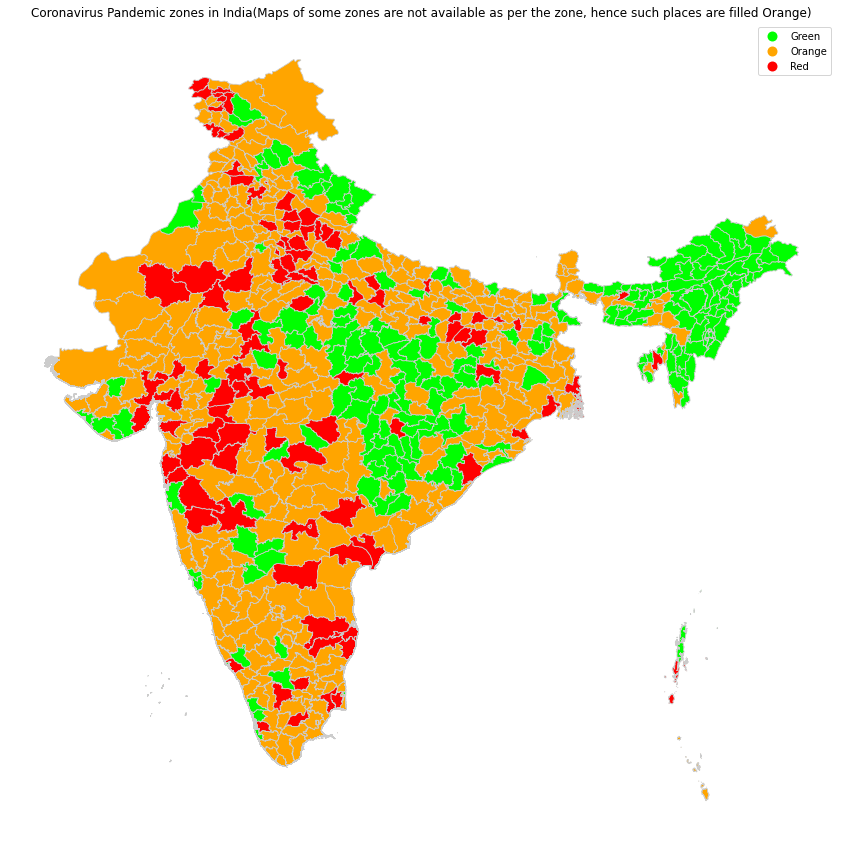

In [57]:
df_distzones = df_distzones.fillna("Orange")
fig = df_distzones.plot(column="zone", cmap=cmap, linewidth=0.8,figsize=(15,15), edgecolor='0.8', legend=True)
fig.axis("off")
fig.set_title("Coronavirus Pandemic zones in India(Maps of some zones are not available as per the zone, hence such places are filled Orange)")

## Distribution of cases by age

In [58]:
df_age = pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")

fig = px.bar(df_age,x = "AgeGroup",y="TotalCases",title="Distribution of Covid-19 cases by age group")
fig.show()

In [59]:
fig = px.pie(df_age, values="TotalCases", names="AgeGroup", title="Distribution of Covid-19 by age in India", template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

## Genderwise distribution

In [60]:
df_pat = pd.read_csv("../input/covid19-corona-virus-india-dataset/patients_data.csv")
df_pat = df_pat[["gender","current_status"]]
df_pat = df_pat.dropna()
#df_pat.index = range(len(df_pat))
df_pat

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,10,11,13,20) have mixed types.Specify dtype option on import or set low_memory=False.



,gender,current_status
0,F,Recovered
3,M,Recovered
4,M,Recovered
5,M,Recovered
20,F,Recovered
...,...,...
38123,M,Hospitalized
38124,M,Hospitalized
38125,M,Hospitalized
38126,F,Hospitalized


In [61]:
m_pat = (df_pat["gender"] == "M").sum()
f_pat = (df_pat["gender"] == "F").sum()

fig = go.Figure(data=[
    go.Bar(name='Male', x=["Count"], y=[m_pat]),
    go.Bar(name='Female', x=["Count"], y=[f_pat])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [62]:
m = df_pat["gender"] == "M"
f = df_pat["gender"] == "F"
m_hosp = (df_pat["current_status"][m] == "Hospitalized").sum()
f_hosp = (df_pat["current_status"][f] == "Hospitalized").sum()
m_dec = (df_pat["current_status"][m] == "Deceased").sum()
f_dec = (df_pat["current_status"][f] == "Deceased").sum()
m_rec = (df_pat["current_status"][m] == "Recovered").sum()
f_rec = (df_pat["current_status"][f] == "Recovered").sum()

fig = go.Figure(data=[
    go.Bar(name='Male', x=["Hospitalized","Deceased","Recovered"], y=[m_hosp,m_dec,m_rec]),
    go.Bar(name='Female', x=["Hospitalized","Deceased","Recovered"], y=[f_hosp,f_dec,f_rec])
])
# Change the bar mode
fig.update_layout(barmode='group',title="Distribution of patient state by gender(Patient with not known gender not included)")
fig.show()

## Prediction of the Pandemic

In [63]:
import statsmodels.api as sm
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.neural_network import MLPRegressor
from datetime import timedelta

### Using Regressor models
1) MLP Regressor

### i. Total cases

In [64]:
x = np.arange(len(df_cov_ind)).reshape(-1,1)
y = df_cov_ind["Confirmed"].values

In [65]:
mlp_model1 = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
mlp_model1.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [66]:
pred = mlp_model1.predict(x)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = y, mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [67]:
df_cov_ind["ObservationDate"] = pd.to_datetime(df_cov_ind["ObservationDate"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
fut_pred = mlp_model1.predict(np.arange(len(df_cov_ind),len(df_cov_ind)+90).reshape(-1,1))
fut_time = [df_cov_ind["ObservationDate"].iloc[-1] + timedelta(days=i) for i in range(1,len(fut_pred))]

fig = go.Figure(data=go.Scatter(x=fut_time, y=fut_pred, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()

### ii. Deaths

In [69]:
x = np.arange(len(df_cov_ind)).reshape(-1,1)
y = df_cov_ind["Deaths"].values

In [70]:
mlp_model2 = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
mlp_model2.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [71]:
pred = mlp_model2.predict(x)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = y, mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [72]:
fut_pred = mlp_model2.predict(np.arange(len(df_cov_ind),len(df_cov_ind)+90).reshape(-1,1))
fut_time = [df_cov_ind["ObservationDate"].iloc[-1] + timedelta(days=i) for i in range(1,len(fut_pred))]

fig = go.Figure(data=go.Scatter(x=fut_time, y=fut_pred, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()

### iii. Recovered

In [73]:
x = np.arange(len(df_cov_ind)).reshape(-1,1)
y = df_cov_ind["Recovered"].values

In [74]:
mlp_model3 = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
mlp_model3.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [75]:
pred = mlp_model3.predict(x)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = y, mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [76]:
fut_pred = mlp_model3.predict(np.arange(len(df_cov_ind),len(df_cov_ind)+90).reshape(-1,1))
fut_time = [df_cov_ind["ObservationDate"].iloc[-1] + timedelta(days=i) for i in range(1,len(fut_pred))]

fig = go.Figure(data=go.Scatter(x=fut_time, y=fut_pred, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()

### Using Prophet

### i. Confirmed

In [77]:
pr_data= pd.DataFrame()
pr_data["ds"] = df_cov_ind["ObservationDate"]
pr_data["y"] = df_cov_ind["Confirmed"]
pr_data.index = range(len(pr_data))
pr_data.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [78]:
pr_data['y'] = np.log(pr_data['y'] + 1)
m1=Prophet()
m1.fit(pr_data)

In [79]:
# compare actual vs predicted
pred_date = pd.DataFrame(df_cov_ind["ObservationDate"])
pred_date.columns = ['ds']
pred = m1.predict(pred_date)
pred['yhat'] = np.exp(pred['yhat']) - 1


fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred.yhat, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Confirmed"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [80]:
future=pd.DataFrame([df_cov_ind["ObservationDate"].iloc[-1] + timedelta(i+1) for i in range(120)])
future.columns = ['ds']
forecast=m1.predict(future)
forecast['yhat'] = np.exp(forecast['yhat']) - 1

fig = go.Figure(data=go.Scatter(x=future["ds"], y=forecast.yhat, mode="lines+markers"))
fig.update_layout(title="Forecast 4 months")
fig.show()

### ii. Deaths

In [81]:
pr_data= pd.DataFrame()
pr_data["ds"] = df_cov_ind["ObservationDate"]
pr_data["y"] = df_cov_ind["Deaths"]
pr_data.index = range(len(pr_data))
pr_data.head()

,ds,y
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [82]:
pr_data['y'] = np.log(pr_data['y'] + 1)
m2=Prophet()
m2.fit(pr_data)

In [83]:
pred_date = pd.DataFrame(df_cov_ind["ObservationDate"])
pred_date.columns = ['ds']
pred = m2.predict(pred_date)
pred['yhat'] = np.exp(pred['yhat']) - 1


fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred.yhat, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Deaths"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [84]:
future=pd.DataFrame([df_cov_ind["ObservationDate"].iloc[-1] + timedelta(i+1) for i in range(120)])
future.columns = ['ds']
forecast=m2.predict(future)
forecast['yhat'] = np.exp(forecast['yhat']) - 1

fig = go.Figure(data=go.Scatter(x=future["ds"], y=forecast.yhat, mode="lines+markers"))
fig.update_layout(title="Forecast 4 months")
fig.show()

### iii. Recovered

In [85]:
pr_data= pd.DataFrame()
pr_data["ds"] = df_cov_ind["ObservationDate"]
pr_data["y"] = df_cov_ind["Recovered"]
pr_data.index = range(len(pr_data))
pr_data.head()

,ds,y
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [86]:
pr_data['y'] = np.log(pr_data['y'] + 1)
m3=Prophet()
m3.fit(pr_data)

In [87]:
pred_date = pd.DataFrame(df_cov_ind["ObservationDate"])
pred_date.columns = ['ds']
pred = m3.predict(pred_date)
pred['yhat'] = np.exp(pred['yhat']) - 1


fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred.yhat, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Recovered"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [88]:
future=pd.DataFrame([df_cov_ind["ObservationDate"].iloc[-1] + timedelta(i+1) for i in range(120)])
future.columns = ['ds']
forecast=m3.predict(future)
forecast['yhat'] = np.exp(forecast['yhat']) - 1

fig = go.Figure(data=go.Scatter(x=future["ds"], y=forecast.yhat, mode="lines+markers"))
fig.update_layout(title="Forecast 4 months")
fig.show()

### Using ARIMA

### i. Confirmed

In [89]:
arima_data = pd.DataFrame()
arima_data["confirmed_data"] = df_cov_ind["ObservationDate"]
arima_data["count"] = df_cov_ind["Confirmed"]
arima_data.index = range(len(arima_data))
arima_data.head()

,confirmed_data,count
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [90]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.4 MB/s 


In [91]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(arima_data['count'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    
                          suppress_warnings = True,  
                          stepwise = True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1331.392, BIC=1344.108, Time=0.554 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1381.583, BIC=1386.669, Time=0.017 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1334.928, BIC=1345.101, Time=0.416 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1332.387, BIC=1342.560, Time=0.350 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1379.651, BIC=1382.194, Time=0.015 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=1340.860, BIC=1351.033, Time=0.116 seconds
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=1330.984, BIC=1346.244, Time=0.873 seconds
Fit ARIMA(1,2,1)x(1,1,0,12) [intercept=True]; AIC=1335.540, BIC=1348.256, Time=0.388 seconds
Fit ARIMA(1,2,1)x(2,1,1,12) [intercept=True]; AIC=1332.800, BIC=1350.603, Time=2.428 seconds
Fit ARIMA(1,2,1)x(1,1,2,12) [intercept=True]; AIC=1332.853, BIC=1350.656, Time=2.798 seconds
Fit ARIMA(1,2,1)x(0,1,2,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  108
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -658.043
Date:                              Mon, 18 May 2020   AIC                           1330.085
Time:                                      04:54:35   BIC                           1347.888
Sample:                                           0   HQIC                          1337.276
                                              - 108                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.1657     16.174      0.999      0.318     -15.535      47.867
ar.L1         -0.8550      0.146     -5.844      0.000      -1.142      -0.568
ma.L1          0.1482      0.199      0.744      0.457      -0.242       0.539
ma.L2         -0.3686      0.131     -2.812      0.005      -0.625      -0.112
ar.S.L12       0.4285      0.563      0.761      0.447      -0.675       1.532
ma.S.L12      -0.9595      2.215     -0.433      0.665      -5.302       3.383
sigma2      6.136e+04   1.09e+05      0.565      0.572   -1.52e+05    2.74e+05
===================================================================================
Ljung-Box (Q):                       35.59   Jarque-Bera (JB):               475.45
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):             104.46   Skew:                             2.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
model1= SARIMAX(arima_data['count'],order=(1,2,2),seasonal_order=(1,1,1,12)) #Change the model as per the result of above as the dataset is updated
fit_model1 = model1.fit(full_output=True, disp=True)
fit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                count   No. Observations:                  108
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -660.170
Date:                              Mon, 18 May 2020   AIC                           1332.340
Time:                                      04:54:36   BIC                           1347.599
Sample:                                           0   HQIC                          1338.503
                                              - 108                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8397      0.141     -5.950      0.000      -1.116      -0.563
ma.L1          0.1976      0.186      1.060      0.289      -0.168       0.563
ma.L2         -0.2834      0.108     -2.624      0.009      -0.495      -0.072
ar.S.L12       0.3865      0.575      0.672      0.502      -0.741       1.514
ma.S.L12      -0.7335      0.543     -1.350      0.177      -1.798       0.331
sigma2      7.129e+04   6181.010     11.533      0.000    5.92e+04    8.34e+04
===================================================================================
Ljung-Box (Q):                       36.27   Jarque-Bera (JB):               355.00
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):            7166.83   Skew:                             2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
pred = fit_model1.predict(0,len(arima_data)-1)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Confirmed"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [94]:
forecast = fit_model1.forecast(steps=90)
fig = go.Figure(data=go.Scatter(x=fut_time, y=forecast, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()

### ii. Deaths

In [95]:
arima_data = pd.DataFrame()
arima_data["confirmed_data"] = df_cov_ind["ObservationDate"]
arima_data["count"] = df_cov_ind["Deaths"]
arima_data.index = range(len(arima_data))
arima_data.head()

,confirmed_data,count
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [96]:
stepwise_fit = auto_arima(arima_data['count'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    
                          suppress_warnings = True,  
                          stepwise = True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=789.244, BIC=801.960, Time=0.628 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=868.232, BIC=873.318, Time=0.019 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=823.509, BIC=833.682, Time=0.241 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=787.663, BIC=797.836, Time=0.455 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=866.292, BIC=868.835, Time=0.019 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=828.064, BIC=838.238, Time=0.073 seconds
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=828.993, BIC=844.252, Time=0.575 seconds
Near non-invertible roots for order (1, 2, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
F

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -389.832
Date:                            Mon, 18 May 2020   AIC                            787.663
Time:                                    04:54:47   BIC                            797.836
Sample:                                         0   HQIC                           791.772
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4396      0.140      3.146      0.002       0.166       0.713
ma.L1         -0.7643      0.062    -12.298      0.000      -0.886      -0.643
ma.S.L12      -0.9978     17.171     -0.058      0.954     -34.652      32.656
sigma2       175.9892   3007.058      0.059      0.953   -5717.737    6069.715
===================================================================================
Ljung-Box (Q):                       40.63   Jarque-Bera (JB):              2173.37
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):             152.78   Skew:                             3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
model2= SARIMAX(arima_data['count'],order=(0,2,1),seasonal_order=(0,1,1,12)) #Change the model as per the result of above as the dataset is updated
fit_model2 = model2.fit(full_output=True, disp=True)
fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                  108
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -392.990
Date:                            Mon, 18 May 2020   AIC                            791.980
Time:                                    04:54:47   BIC                            799.609
Sample:                                         0   HQIC                           795.062
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6659      0.071     -9.386      0.000      -0.805      -0.527
ma.S.L12      -0.8340      0.224     -3.730      0.000      -1.272      -0.396
sigma2       215.0385     25.597      8.401      0.000     164.869     265.208
===================================================================================
Ljung-Box (Q):                       42.68   Jarque-Bera (JB):              2000.99
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):           10176.81   Skew:                             3.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
pred = fit_model2.predict(0,len(arima_data)-1)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Deaths"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [99]:
forecast = fit_model2.forecast(steps=90)
fig = go.Figure(data=go.Scatter(x=fut_time, y=forecast, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()

### iii. Recovered

In [100]:
arima_data = pd.DataFrame()
arima_data["confirmed_data"] = df_cov_ind["ObservationDate"]
arima_data["count"] = df_cov_ind["Recovered"]
arima_data.index = range(len(arima_data))
arima_data.head()

,confirmed_data,count
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [101]:
stepwise_fit = auto_arima(arima_data['count'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    
                          suppress_warnings = True,  
                          stepwise = True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1280.815, BIC=1293.531, Time=0.551 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1278.540, BIC=1283.627, Time=0.019 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1281.991, BIC=1292.164, Time=0.250 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1279.994, BIC=1290.167, Time=0.222 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1278.487, BIC=1281.030, Time=0.019 seconds
Fit ARIMA(0,2,0)x(1,1,0,12) [intercept=True]; AIC=1280.236, BIC=1287.866, Time=0.158 seconds
Fit ARIMA(0,2,0)x(0,1,1,12) [intercept=True]; AIC=1279.604, BIC=1287.234, Time=0.234 seconds
Fit ARIMA(0,2,0)x(1,1,1,12) [intercept=True]; AIC=1279.689, BIC=1289.862, Time=0.421 seconds
Fit ARIMA(1,2,0)x(0,1,0,12) [intercept=True]; AIC=1280.427, BIC=1288.057, Time=0.033 seconds
Fit ARIMA(0,2,1)x(0,1,0,12) [intercept=True]; AIC=1280.200, BIC=1287.830, Time=0.113 seconds
Fit ARIMA(1,2,1)x(0,1,0,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -638.243
Date:                            Mon, 18 May 2020   AIC                           1278.487
Time:                                    04:54:49   BIC                           1281.030
Sample:                                         0   HQIC                          1279.514
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.618e+04   1738.698     26.561      0.000    4.28e+04    4.96e+04
===================================================================================
Ljung-Box (Q):                       15.89   Jarque-Bera (JB):              3064.17
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):          112826.89   Skew:                             4.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
model3= SARIMAX(arima_data['count'],order=(0,2,0),seasonal_order=(0,1,0,12)) #Change the model as per the result of above as the dataset is updated
fit_model3 = model3.fit(full_output=True, disp=True)
fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                  108
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -638.243
Date:                            Mon, 18 May 2020   AIC                           1278.487
Time:                                    04:54:49   BIC                           1281.030
Sample:                                         0   HQIC                          1279.514
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.618e+04   1738.698     26.561      0.000    4.28e+04    4.96e+04
===================================================================================
Ljung-Box (Q):                       15.89   Jarque-Bera (JB):              3064.17
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):          112826.89   Skew:                             4.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
pred = fit_model3.predict(0,len(arima_data)-1)

fig = go.Figure(data = [go.Scatter(x = df_cov_ind["ObservationDate"], y = pred, mode="lines+markers", name = "Predicted"),
               go.Scatter(x = df_cov_ind["ObservationDate"], y = df_cov_ind["Recovered"], mode="lines+markers", name = "Actual")])
fig.update_layout(title = "Predicted values vs Actual values")
fig.show()

In [104]:
forecast = fit_model3.forecast(steps=90)
fig = go.Figure(data=go.Scatter(x=fut_time, y=forecast, mode="lines+markers"))
fig.update_layout(title="Forecast 3 months")
fig.show()